In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
print(data)

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]


In [3]:
def splitSequence(seq, n_steps):

    #Declare X and y as empty list
    X = []
    y = []

    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps

        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break

        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]

        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)

    return X,y

In [4]:
n_steps = 7
X, y = splitSequence(data, n_steps)

In [5]:
print(X)

[[ 10  15  20  25  30  35  40]
 [ 15  20  25  30  35  40  45]
 [ 20  25  30  35  40  45  50]
 [ 25  30  35  40  45  50  55]
 [ 30  35  40  45  50  55  60]
 [ 35  40  45  50  55  60  65]
 [ 40  45  50  55  60  65  70]
 [ 45  50  55  60  65  70  75]
 [ 50  55  60  65  70  75  80]
 [ 55  60  65  70  75  80  85]
 [ 60  65  70  75  80  85  90]
 [ 65  70  75  80  85  90  95]
 [ 70  75  80  85  90  95 100]]


In [6]:
print(y)

[ 45  50  55  60  65  70  75  80  85  90  95 100 105]


In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[[10]
  [15]
  [20]
  [25]
  [30]
  [35]
  [40]]

 [[15]
  [20]
  [25]
  [30]
  [35]
  [40]
  [45]]]


In [18]:
model = tf.keras.Sequential()
model.add(layers.LSTM(500, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 500)               1004000   
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 1,004,501
Trainable params: 1,004,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError())

In [28]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=5000,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test), verbose=2
)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 - 0s - loss: 0.0658 - val_loss: 0.0277 - 68ms/epoch - 68ms/step
Epoch 2502/5000
1/1 - 0s - loss: 0.0656 - val_loss: 0.0276 - 86ms/epoch - 86ms/step
Epoch 2503/5000
1/1 - 0s - loss: 0.0654 - val_loss: 0.0275 - 73ms/epoch - 73ms/step
Epoch 2504/5000
1/1 - 0s - loss: 0.0652 - val_loss: 0.0275 - 94ms/epoch - 94ms/step
Epoch 2505/5000
1/1 - 0s - loss: 0.0650 - val_loss: 0.0274 - 76ms/epoch - 76ms/step
Epoch 2506/5000
1/1 - 0s - loss: 0.0647 - val_loss: 0.0273 - 72ms/epoch - 72ms/step
Epoch 2507/5000
1/1 - 0s - loss: 0.0645 - val_loss: 0.0272 - 80ms/epoch - 80ms/step
Epoch 2508/5000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0272 - 76ms/epoch - 76ms/step
Epoch 2509/5000
1/1 - 0s - loss: 0.0641 - val_loss: 0.0271 - 73ms/epoch - 73ms/step
Epoch 2510/5000
1/1 - 0s - loss: 0.0639 - val_loss: 0.0270 - 62ms/epoch - 62ms/step
Epoch 2511/5000
1/1 - 0s - loss: 0.0637 - val_loss: 0.0269 - 69ms/epoch - 69ms/step
Epoch 2512/5000
1/1 - 0s 

In [25]:
test_data = np.array([45, 50, 55, 60, 65, 70, 75])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[45],
        [50],
        [55],
        [60],
        [65],
        [70],
        [75]]])

In [26]:
predictNextNumber = model.predict(test_data, verbose=2)
print(predictNextNumber)

1/1 - 0s - 120ms/epoch - 120ms/step
[[79.993004]]


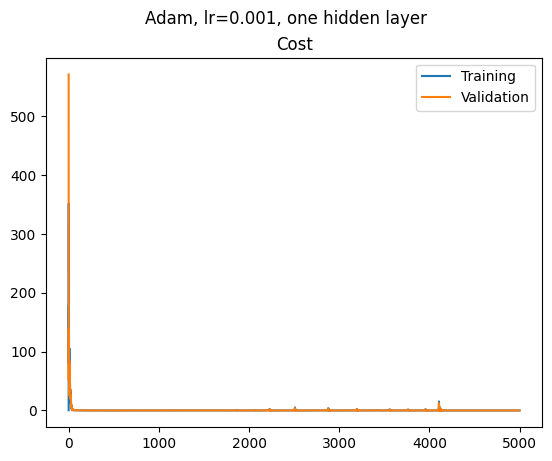

In [27]:
fig = plt.figure()
fig.suptitle("Adam, lr=0.001, one hidden layer")
ax = fig.add_subplot(1,1, 1)
ax.set_title('Cost')
ax.plot(history.history['loss'], label='Training')
ax.plot(history.history['val_loss'], label='Validation')
ax.legend()
fig.show()